<a href="https://colab.research.google.com/github/GOPIKA-S-S/ML-LAB2/blob/main/LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [41]:
df=pd.read_csv('/content/customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5.0,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3.0,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1.0,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5.0,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4.0,60.60,Cash,24/10/2021,Kanyon


In [42]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          1
price             1
payment_method    1
invoice_date      1
shopping_mall     1
dtype: int64

In [43]:
df['quantity'].fillna(0, inplace=True)

In [44]:
df['price'].fillna(0, inplace=True)

In [45]:
df['invoice_date'].fillna(0, inplace=True)

In [46]:
df['invoice_date'].fillna(0, inplace=True)

In [47]:
df['shopping_mall'].fillna(0,inplace=True)

In [48]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    1
invoice_date      0
shopping_mall     0
dtype: int64

In [49]:
age_bins=[0,18,25,35,45,float('inf')]
age_labels=['<18','18-25','26-35','36-45','46+']
df['AgeGroup']=pd.cut(df['age'],bins=age_bins,labels=age_labels,right=False)
print(df[['age','AgeGroup']])


       age AgeGroup
0       28    26-35
1       21    18-25
2       20    18-25
3       66      46+
4       53      46+
...    ...      ...
41470   33    26-35
41471   69      46+
41472   64      46+
41473   57      46+
41474   35    36-45

[41475 rows x 2 columns]


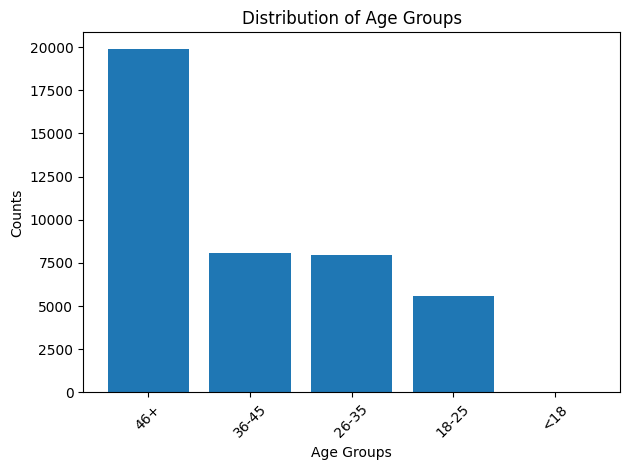

In [50]:
# Assuming your dataset has an "age_group" column
age_group_counts = df['AgeGroup'].value_counts()
# Create a bar plot using Matplotlib
plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel("Age Groups")
plt.ylabel("Counts")
plt.title("Distribution of Age Groups")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# Show the plot
plt.tight_layout()
plt.show()


In [51]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()

# Assuming 'gender' is a categorical column
df['gender'] = label_encoder.fit_transform(df['gender'])
df['category'] = label_encoder.fit_transform(df['category'])
print(df)


      invoice_no customer_id  gender  age  category  quantity    price  \
0        I138884     C241288       0   28         1       5.0  1500.40   
1        I317333     C111565       1   21         4       3.0  1800.51   
2        I127801     C266599       1   20         1       1.0   300.08   
3        I173702     C988172       0   66         4       5.0  3000.85   
4        I337046     C189076       0   53         0       4.0    60.60   
...          ...         ...     ...  ...       ...       ...      ...   
41470    I302520     C172925       0   33         4       3.0  1800.51   
41471    I348120     C793466       0   69         1       2.0   600.16   
41472    I249313     C280986       1   64         1       1.0   300.08   
41473    I128948     C133689       1   57         2       3.0   121.98   
41474    I621844     C888063       0   35         6       0.0     0.00   

      payment_method invoice_date   shopping_mall AgeGroup  
0        Credit Card     5/8/2022          Kanyon 

In [52]:
import numpy as np

# Assuming you have columns 'age' and 'category_1', 'category_2', ... representing the numerical categories
# Replace 'category_1', 'category_2', ... with the actual column names

# Extract the columns from your data
age = df['age']
category_columns = df[['category']]

# Calculate the covariance matrix
covariance_matrix = np.cov(age, category_columns, rowvar=False)

print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
[[2.25035453e+02 7.16699160e-02]
 [7.16699160e-02 5.64761054e+00]]


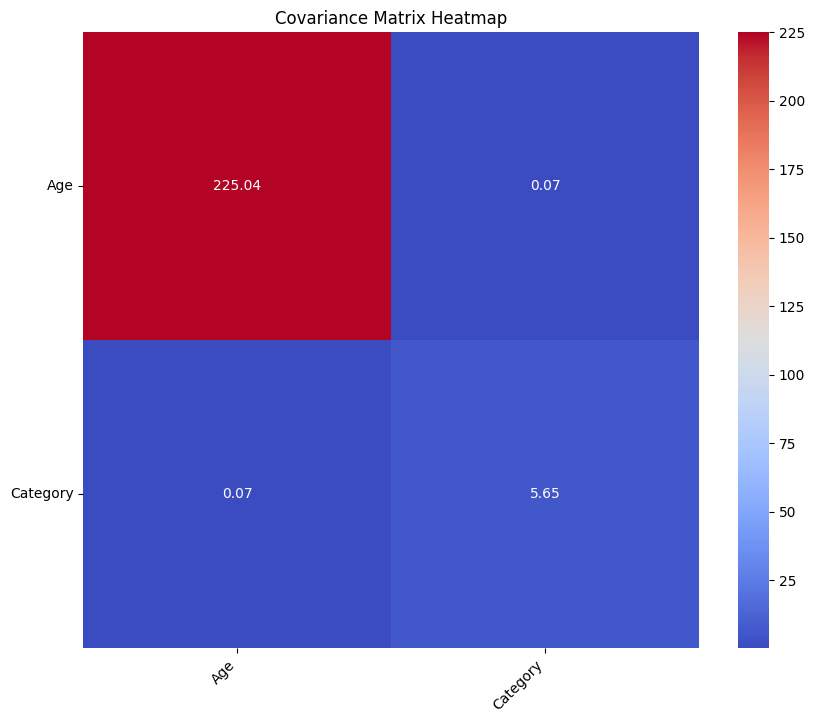

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have calculated the covariance matrix
# Replace 'covariance_matrix' with the actual covariance matrix

# Create custom labels for x and y axes
feature_names = ['Age', 'Category']  # Replace with actual feature names

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

# Set x and y axis labels
heatmap.set_xticklabels(feature_names, rotation=45, ha='right')
heatmap.set_yticklabels(feature_names, rotation=0)

plt.title("Covariance Matrix Heatmap")
plt.show()


In [61]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['gender'], df['category'])

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Expected-value:",expected)


Chi-Square Statistic: 10.609255113020811
P-value: 0.22483699231213453
Expected-value: [[1.24223267e+03 8.54691911e+03 3.74998987e+03 3.69623942e+03
  2.49163207e+03 1.25477444e+03 5.97227245e-01 1.25477444e+03
  2.53284075e+03]
 [8.37767330e+02 5.76408089e+03 2.52901013e+03 2.49276058e+03
  1.68036793e+03 8.46225558e+02 4.02772755e-01 8.46225558e+02
  1.70815925e+03]]


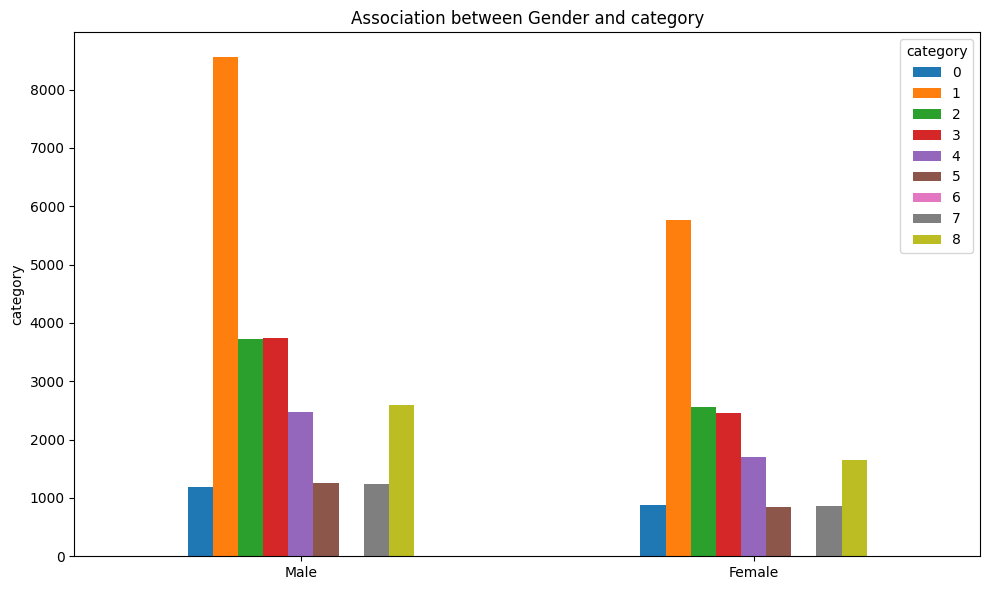

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

feature_names = ['Age', 'Category']
contingency_table.index = ['Male', 'Female']
# Plot the association using a bar plot
contingency_table.plot(kind='bar', figsize=(10, 6))
plt.ylabel('category')
plt.title('Association between Gender and category')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='category')
plt.tight_layout()
plt.show()
